In [2]:
#word2vec vektör görselleştirme

In [8]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [9]:
model = Word2Vec.load("../data/word2vec.model")

In [10]:
words = list(model.wv.index_to_key)
words[:6]

['dil', 'doğal', 'işle', 've', 'bir', 'yapay']

In [11]:
df_name = []
df_count = []

for i in words:
    df_name.append(i)
    df_count.append(model.wv.get_vecattr(i,"count"))
    
df = pd.DataFrame({"name":df_name, "count":df_count})
df.head()

name  count
0    dil    968
1  doğal    826
2   işle    733
3     ve   1255
4    bir   2264

In [12]:
df.sort_values("count", ascending=False).head()

name  count
4   bir   2264
13  çok   1779
3    ve   1255
9    bu   1190
0   dil    968

In [13]:
df.index

RangeIndex(start=0, stop=10716, step=1)

In [14]:
model.wv.most_similar(["doğal"])

[('ve', 0.9995797276496887),
 ('bir', 0.9994572997093201),
 ('iç', 0.9994140267372131),
 ('dil', 0.9993937611579895),
 ('dah', 0.9993776082992554),
 ('işle', 0.9993649125099182),
 ('bu', 0.9993274211883545),
 ('il', 0.9993135333061218),
 ('gip', 0.9993094801902771),
 ('olarak', 0.999284565448761)]

In [15]:
model.wv.most_similar(["dil"])

[('ve', 0.9995208978652954),
 ('bir', 0.9995190501213074),
 ('bu', 0.9995183348655701),
 ('il', 0.9994869828224182),
 ('iç', 0.9994144439697266),
 ('doğal', 0.9993937611579895),
 ('da', 0.999381422996521),
 ('işle', 0.999351441860199),
 ('iş', 0.9992786645889282),
 ('gör', 0.9992524981498718)]

In [16]:
model.wv.most_similar(["işle"])

[('bir', 0.9995040893554688),
 ('ve', 0.9994491338729858),
 ('iç', 0.9994184374809265),
 ('doğal', 0.9993650913238525),
 ('dil', 0.9993515610694885),
 ('il', 0.9993197321891785),
 ('bu', 0.9992297291755676),
 ('zeka', 0.999174952507019),
 ('alan', 0.9991647005081177),
 ('var', 0.9990904331207275)]

In [17]:
model.wv.similarity("doğal","dil")

0.99939376

In [18]:
import numpy as np

In [19]:
arr = np.empty((0,100),dtype="f")
arr

array([], shape=(0, 100), dtype=float32)

In [20]:
word = "işle"
word_label = [word]
word_label

['işle']

In [21]:
close_words = model.wv.most_similar([word])
close_words

[('bir', 0.9995040893554688),
 ('ve', 0.9994491338729858),
 ('iç', 0.9994184374809265),
 ('doğal', 0.9993650913238525),
 ('dil', 0.9993515610694885),
 ('il', 0.9993197321891785),
 ('bu', 0.9992297291755676),
 ('zeka', 0.999174952507019),
 ('alan', 0.9991647005081177),
 ('var', 0.9990904331207275)]

In [22]:
arr = np.append(arr, np.array([model.wv.get_vector(word)]),axis=0)
arr

array([[-0.29336032,  0.3192422 ,  0.0605839 ,  0.154868  ,  0.04762769,
        -0.48157677,  0.20440497,  0.7754076 , -0.24472821, -0.35215405,
        -0.06008523, -0.49517635, -0.15765454,  0.0783098 ,  0.01743508,
        -0.21840122,  0.23486239, -0.38575873, -0.05985081, -0.6420746 ,
         0.23686199,  0.19784495,  0.40073287, -0.09254077, -0.00961762,
         0.08220533, -0.3264573 , -0.02349856, -0.2792625 , -0.0670438 ,
         0.4904203 , -0.06971859,  0.00795912, -0.34002718, -0.10120787,
         0.29103127,  0.12518613, -0.05455737, -0.21011347, -0.43154815,
         0.10654316, -0.29477146, -0.09751485, -0.0297863 ,  0.34793535,
        -0.0979932 , -0.24323376, -0.07587095,  0.2825251 ,  0.23889545,
         0.28754845, -0.30609477, -0.0128386 , -0.17856327, -0.18748339,
         0.140485  ,  0.28290632, -0.06323342, -0.3142359 ,  0.05300346,
        -0.05442525,  0.09452466,  0.09960738,  0.1029563 , -0.43424   ,
         0.39557993, -0.06659482,  0.275007  , -0.3

In [23]:
for word_score in close_words:
    wrd_vector = model.wv.get_vector(word_score[0])
    word_label.append(word_score[0])
    arr = np. append(arr, np.array([wrd_vector]),axis=0)

In [24]:
arr

array([[-0.29336032,  0.3192422 ,  0.0605839 , ..., -0.26422983,
         0.09043176,  0.09218024],
       [-0.3360683 ,  0.35322702,  0.06686416, ..., -0.2916182 ,
         0.09368409,  0.11349491],
       [-0.38951918,  0.4173572 ,  0.08631592, ..., -0.35131827,
         0.10440733,  0.12292436],
       ...,
       [-0.21018833,  0.22937764,  0.04967552, ..., -0.20468335,
         0.06048786,  0.08024166],
       [-0.16010332,  0.19058938,  0.03996514, ..., -0.157451  ,
         0.04285165,  0.05485275],
       [-0.20226353,  0.23288688,  0.04053294, ..., -0.17939316,
         0.05845978,  0.06835166]], dtype=float32)

In [25]:
len(arr)

11

In [26]:
arr[0]

array([-0.29336032,  0.3192422 ,  0.0605839 ,  0.154868  ,  0.04762769,
       -0.48157677,  0.20440497,  0.7754076 , -0.24472821, -0.35215405,
       -0.06008523, -0.49517635, -0.15765454,  0.0783098 ,  0.01743508,
       -0.21840122,  0.23486239, -0.38575873, -0.05985081, -0.6420746 ,
        0.23686199,  0.19784495,  0.40073287, -0.09254077, -0.00961762,
        0.08220533, -0.3264573 , -0.02349856, -0.2792625 , -0.0670438 ,
        0.4904203 , -0.06971859,  0.00795912, -0.34002718, -0.10120787,
        0.29103127,  0.12518613, -0.05455737, -0.21011347, -0.43154815,
        0.10654316, -0.29477146, -0.09751485, -0.0297863 ,  0.34793535,
       -0.0979932 , -0.24323376, -0.07587095,  0.2825251 ,  0.23889545,
        0.28754845, -0.30609477, -0.0128386 , -0.17856327, -0.18748339,
        0.140485  ,  0.28290632, -0.06323342, -0.3142359 ,  0.05300346,
       -0.05442525,  0.09452466,  0.09960738,  0.1029563 , -0.43424   ,
        0.39557993, -0.06659482,  0.275007  , -0.3153117 ,  0.38

In [27]:
tsne = TSNE(n_components=2, random_state=42,perplexity=3)
np.printoptions(suppress=True)
Y = tsne.fit_transform(arr)
Y

array([[ -2.7906637 , -26.611069  ],
       [ -7.8959193 , -48.739876  ],
       [ -7.849817  , -58.592896  ],
       [ -1.8217124 , -17.295048  ],
       [ -5.9941874 , -40.441044  ],
       [ -0.67078173, -45.70916   ],
       [ -2.6061    ,  -8.426505  ],
       [  4.045914  , -12.30875   ],
       [  0.8408235 ,  16.739689  ],
       [  5.738769  ,  26.487516  ],
       [ -1.3183031 ,  22.842327  ]], dtype=float32)

In [28]:
x_cords = Y[:,0]
x_cords

array([-2.7906637 , -7.8959193 , -7.849817  , -1.8217124 , -5.9941874 ,
       -0.67078173, -2.6061    ,  4.045914  ,  0.8408235 ,  5.738769  ,
       -1.3183031 ], dtype=float32)

In [29]:
word_label

['işle', 'bir', 've', 'iç', 'doğal', 'dil', 'il', 'bu', 'zeka', 'alan', 'var']

In [30]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [31]:
import plotly.express as px 

In [32]:
fig = px.scatter(x=x_cords.tolist(),text=word_label,size_max= 100)

fig.update_layout(height=800,title_text="Word2Vec Most Similarity")

fig.show()

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [37]:
len(words)

10716

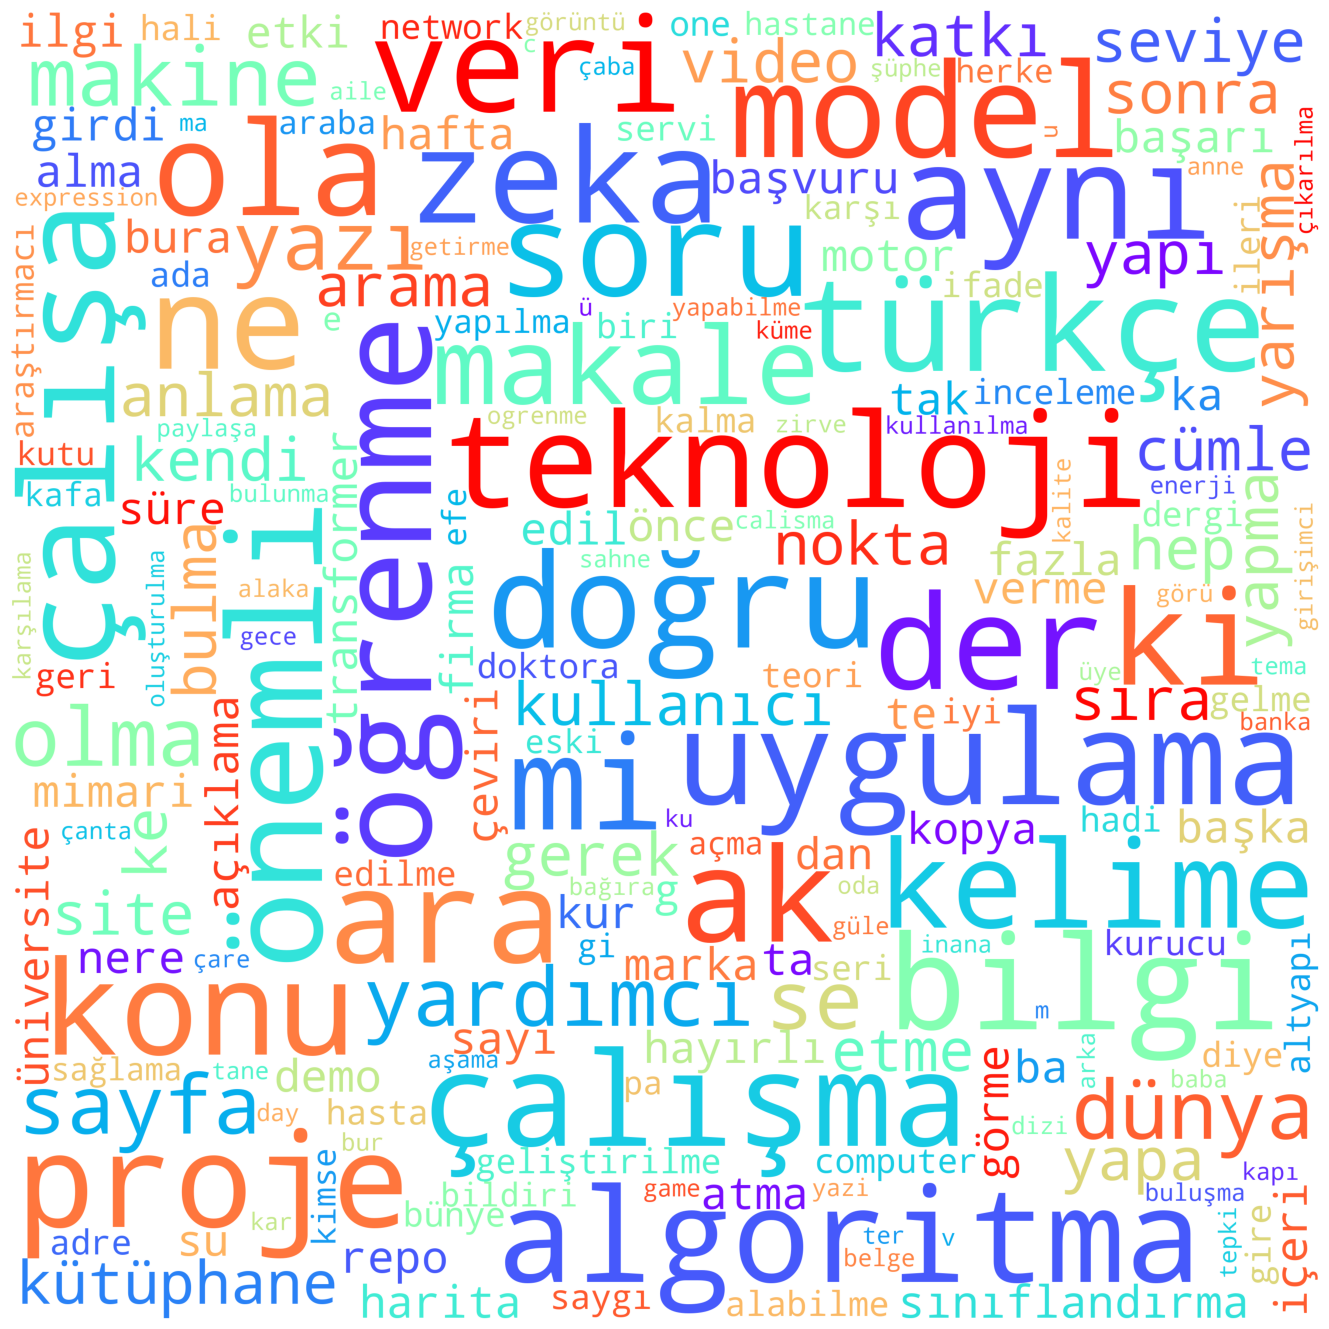

In [35]:
sentence = []
for i in words:
    sentence.append(i)
text = " ".join(map(str,sentence))

wordcloud = WordCloud(width=3000,height=3000, max_font_size=300, background_color="white",colormap="rainbow").generate(text)

plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation=None)
plt.axis("off")
plt.show()